In [270]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [271]:
#Cargamos la base de datos
df = pd.read_csv('Base_Act1_1.csv')
df.head()   

,room_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_rating,calculated_host_listings_count,availability_365,reviews_per_month,review_scores_communication
0,Entire home/apt,Not specified,Not specified,3799.0,0,4.748716,1,364,1.806801,4.823578
1,Entire home/apt,91%,100%,18000.0,65,4.590000,9,360,0.390000,4.780000
2,Entire home/apt,100%,100%,585.0,84,4.870000,1,338,0.480000,4.940000
3,Entire home/apt,47%,100%,1696.0,50,4.900000,2,267,0.300000,4.920000
4,Entire home/apt,85%,100%,1004.0,132,4.920000,3,211,0.810000,4.980000


In [272]:
#Verificamos que ya no existan valores nulos
df.isna().sum().sum()

np.int64(0)

<Figure size 1500x800 with 0 Axes>

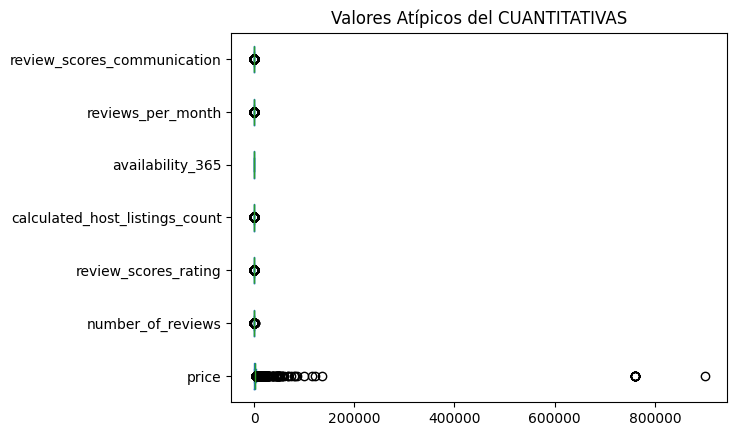

In [273]:
#Creación de 2 dataframe para poder procesar los outliers
cuantitativas = df.select_dtypes(include=['int64','float64'])
cualitativas = df.select_dtypes(include=['object'])

#Realizamos diagrama de caja o bigotes para detectar outliers en las variables cuantitativas
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del CUANTITATIVAS")
plt.show() #dibujamos el diagrama

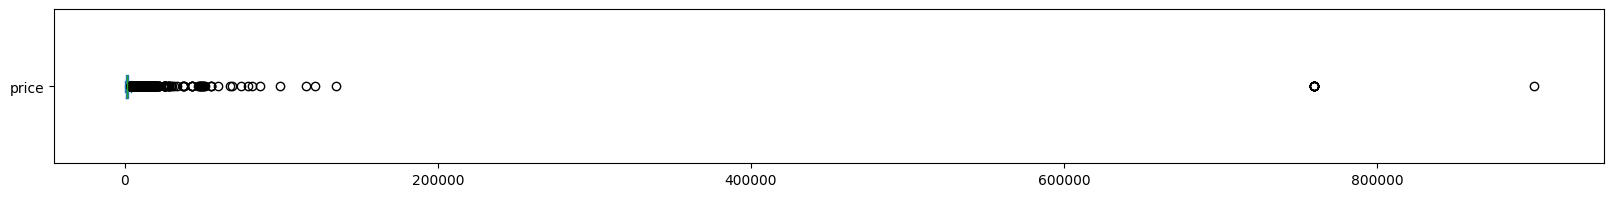

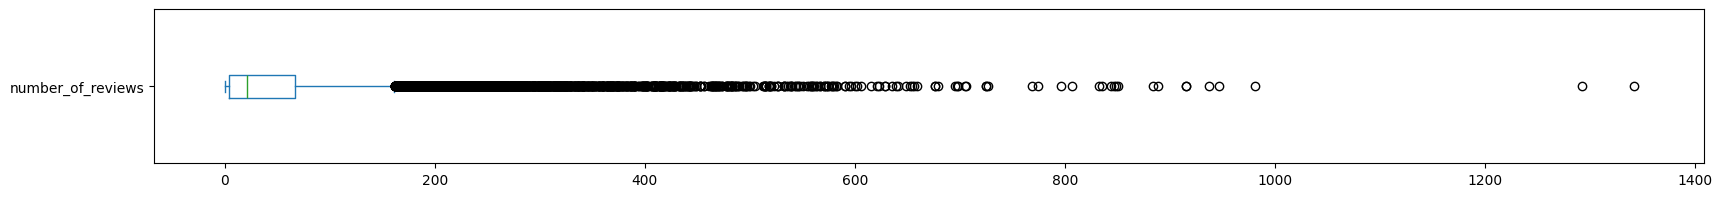

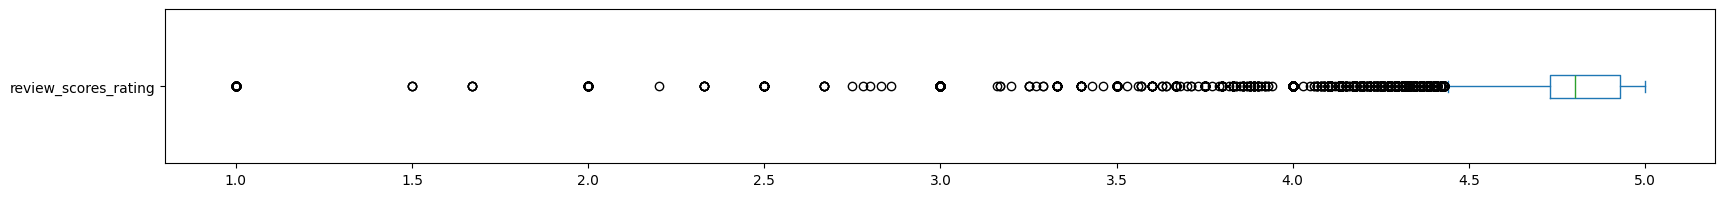

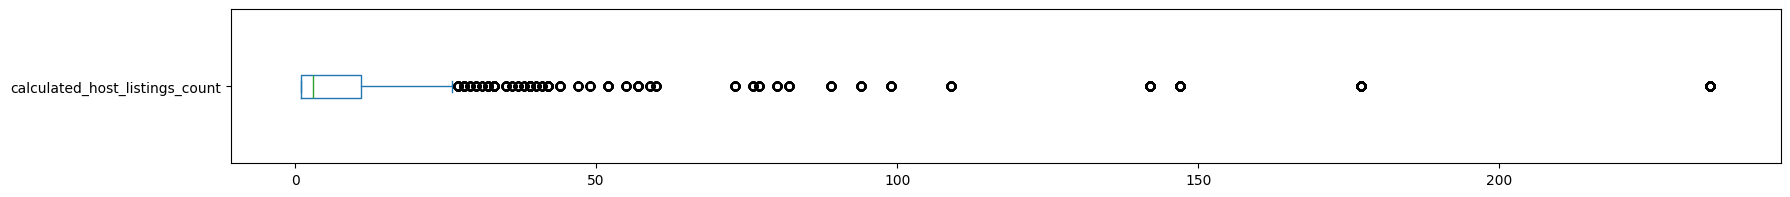

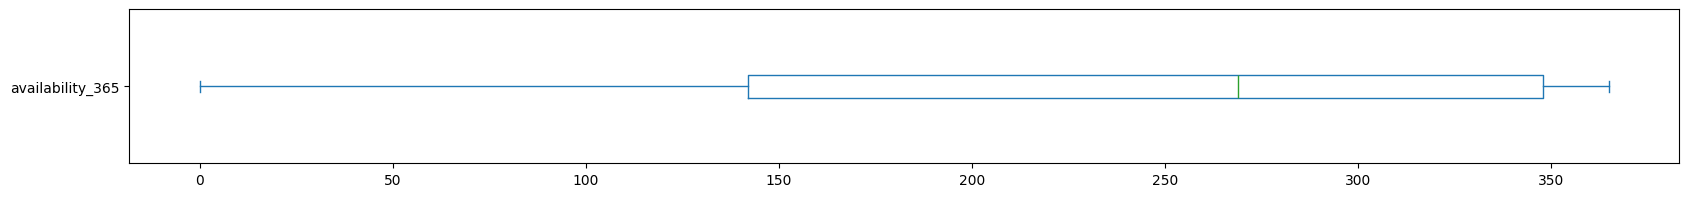

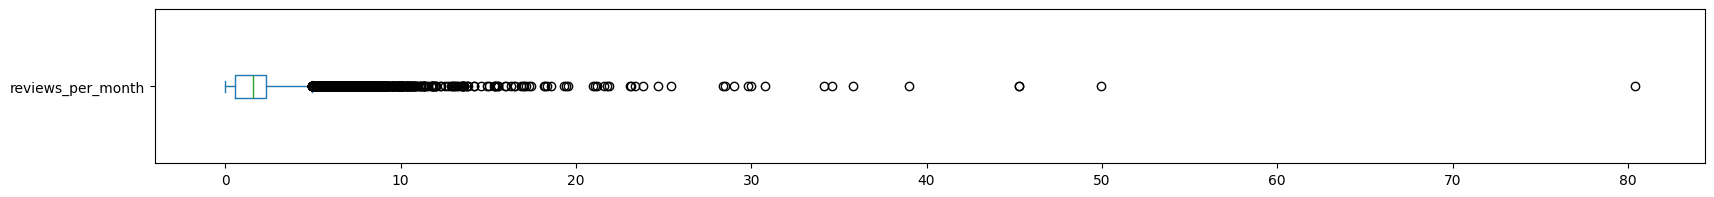

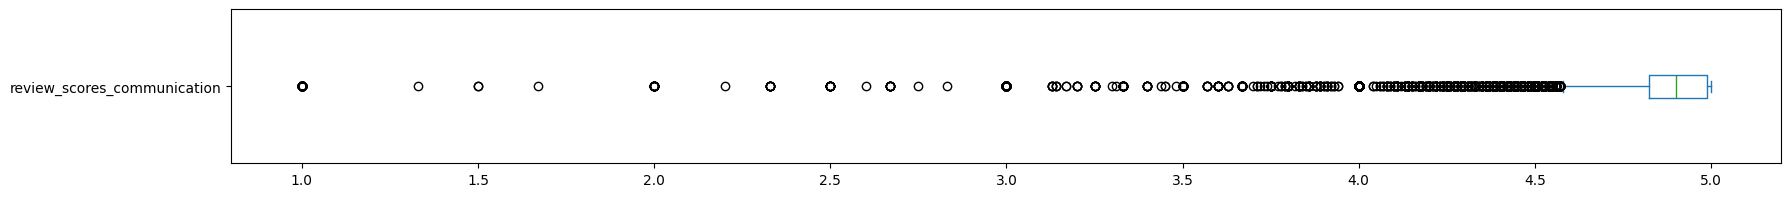

In [274]:
#Realizamos diagrama de caja o bigotes para detectar outliers en cada columna de manera más detallada
fig = plt.figure(figsize =(20, 2))
df['price'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
df['number_of_reviews'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
df['review_scores_rating'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
df['calculated_host_listings_count'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
df['availability_365'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
df['reviews_per_month'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
df['review_scores_communication'].plot(kind='box', vert=False)
plt.show()

In [275]:
#SEPARANDO POR PROCESO DE TRATAMIENTO DE OUTLIERS
desviacion = df[['bathrooms','availability_eoy']]


KeyError: "None of [Index(['bathrooms', 'availability_eoy'], dtype='object')] are in the [columns]"

Limite superior permitido price                             3939.731180
number_of_reviews                  161.500000
review_scores_rating                 5.230000
calculated_host_listings_count      26.000000
availability_365                   657.000000
number_of_reviews.1                161.500000
reviews_per_month                    4.965000
review_scores_communication          5.239633
dtype: float64
Limite inferior permitido price                            -1261.438708
number_of_reviews                  -90.500000
review_scores_rating                 4.430000
calculated_host_listings_count     -14.000000
availability_365                  -167.000000
number_of_reviews.1                -90.500000
reviews_per_month                   -2.115000
review_scores_communication          4.573945
dtype: float64


<Figure size 2000x200 with 0 Axes>

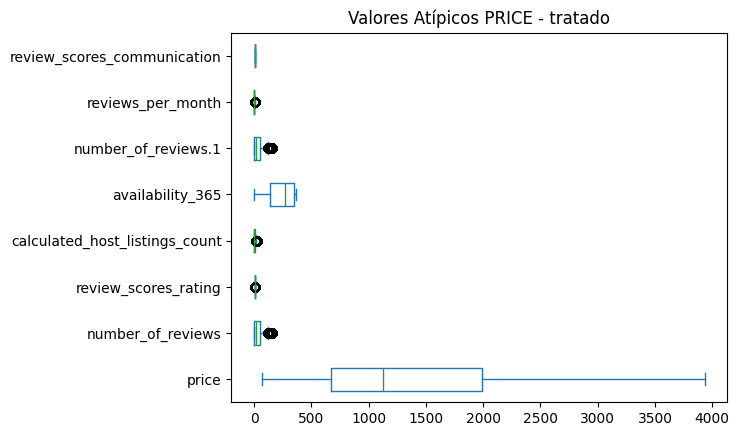

In [ ]:
#TODAS LAS COLUMNAS CUANTITATIVAS 
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y0= cuantitativas

percentile25=y0.quantile(0.25) #Q1
percentile75=y0.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
data0= y0[(y0<=Limite_Superior_iqr)&(y0>=Limite_Inferior_iqr)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data0.plot(kind='box', vert=False)
plt.title("Valores Atípicos PRICE - tratado")
plt.show()

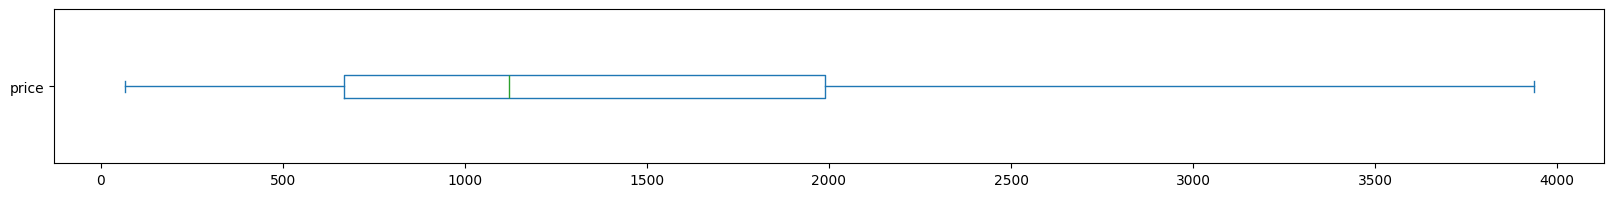

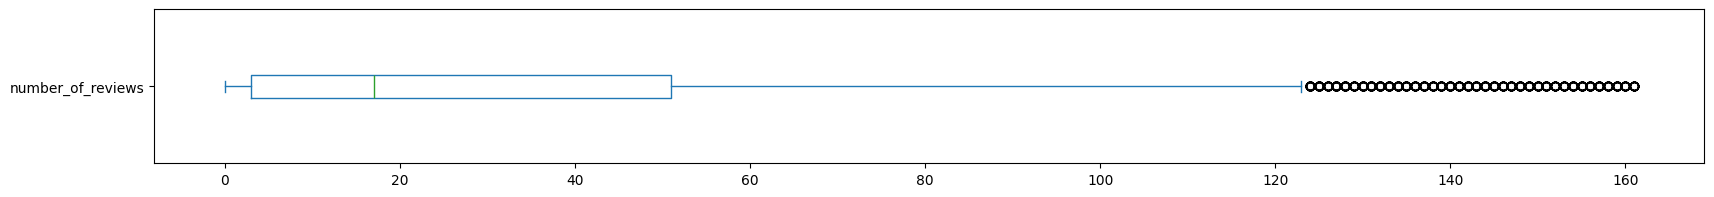

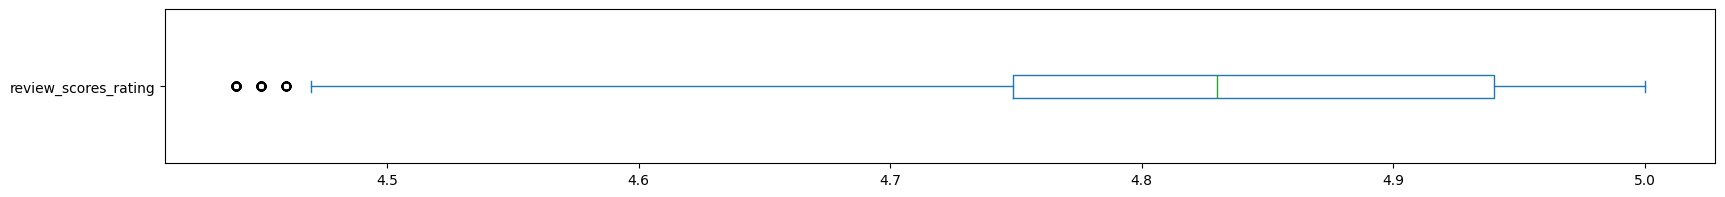

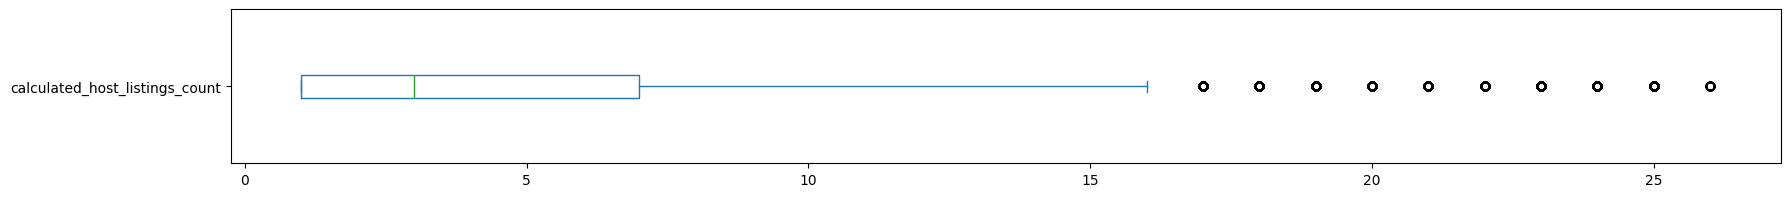

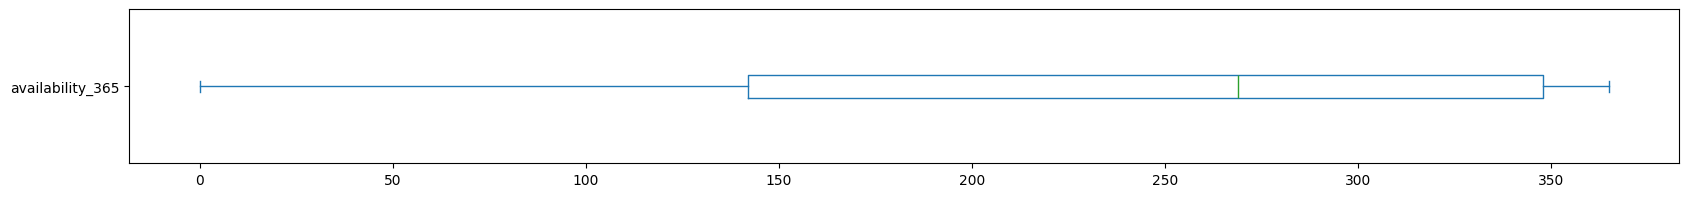

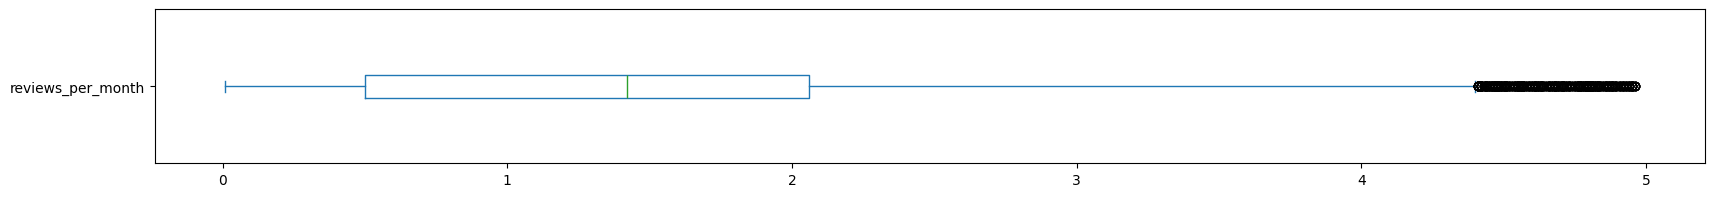

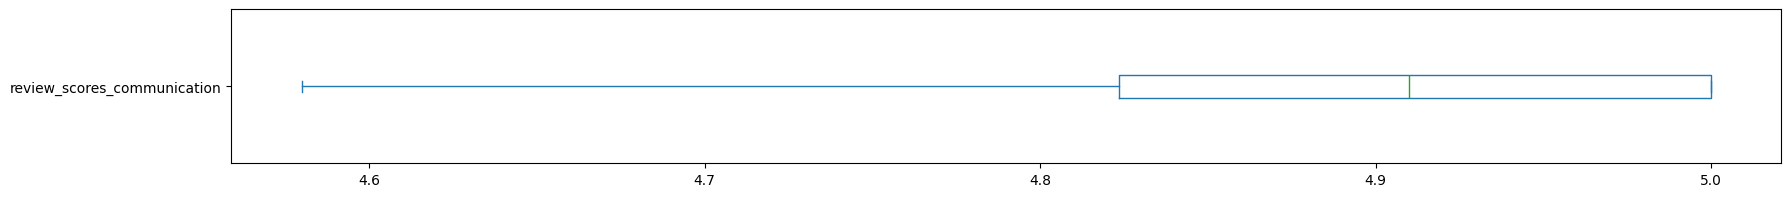

In [ ]:
#Realizamos diagrama de caja o bigotes para detectar outliers en cada columna de manera más detallada - tratados
fig = plt.figure(figsize =(20, 2))
data0['price'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
data0['number_of_reviews'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
data0['review_scores_rating'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
data0['calculated_host_listings_count'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
data0['availability_365'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
data0['reviews_per_month'].plot(kind='box', vert=False)
plt.show()

fig = plt.figure(figsize =(20, 2))
data0['review_scores_communication'].plot(kind='box', vert=False)
plt.show()

In [ ]:
cualitativas.head()

,room_type,host_acceptance_rate,host_response_rate
0,Entire home/apt,Not specified,Not specified
1,Entire home/apt,91%,100%
2,Entire home/apt,100%,100%
3,Entire home/apt,47%,100%
4,Entire home/apt,85%,100%


In [ ]:
cuantitativas.head()

,price,number_of_reviews,review_scores_rating,calculated_host_listings_count,availability_365,number_of_reviews.1,reviews_per_month,review_scores_communication
0,3799.0,0,4.748716,1,364,0,1.806801,4.823578
1,18000.0,65,4.590000,9,360,65,0.390000,4.780000
2,585.0,84,4.870000,1,338,84,0.480000,4.940000
3,1696.0,50,4.900000,2,267,50,0.300000,4.920000
4,1004.0,132,4.920000,3,211,132,0.810000,4.980000


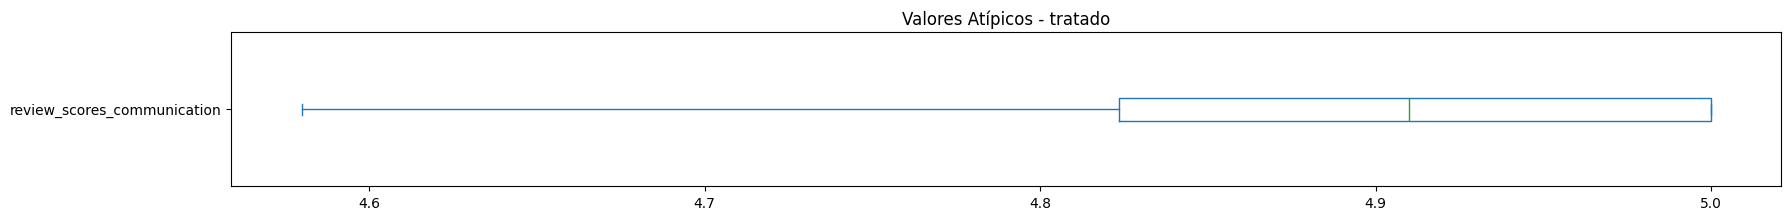

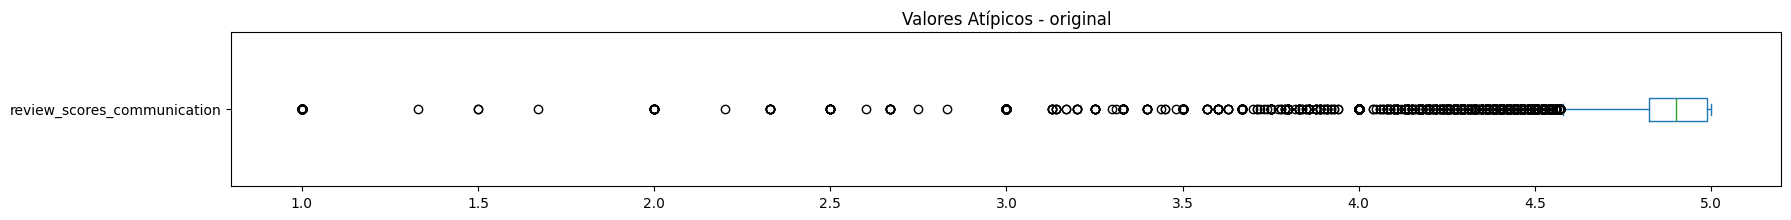

In [ ]:
fig = plt.figure(figsize =(20, 2))
data0['review_scores_communication'].plot(kind='box', vert=False)
plt.title("Valores Atípicos - tratado")
plt.show()

fig = plt.figure(figsize =(20, 2))
cuantitativas['review_scores_communication'].plot(kind='box', vert=False)
plt.title("Valores Atípicos - original")
plt.show()

In [ ]:
dfLimpio = pd.concat([cualitativas, data0], axis=1)
dfLimpio.head()

,room_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_rating,calculated_host_listings_count,availability_365,number_of_reviews.1,reviews_per_month,review_scores_communication
0,Entire home/apt,Not specified,Not specified,3799.0,0.0,4.748716,1.0,364,0.0,1.806801,4.823578
1,Entire home/apt,91%,100%,NaN,65.0,4.590000,9.0,360,65.0,0.390000,4.780000
2,Entire home/apt,100%,100%,585.0,84.0,4.870000,1.0,338,84.0,0.480000,4.940000
3,Entire home/apt,47%,100%,1696.0,50.0,4.900000,2.0,267,50.0,0.300000,4.920000
4,Entire home/apt,85%,100%,1004.0,132.0,4.920000,3.0,211,132.0,0.810000,4.980000


Procesamiento de outliers por el método del rango intercuartílico (IQR) 

Limite superior permitido 3939.731180006053
Limite inferior permitido -1261.4387080036317


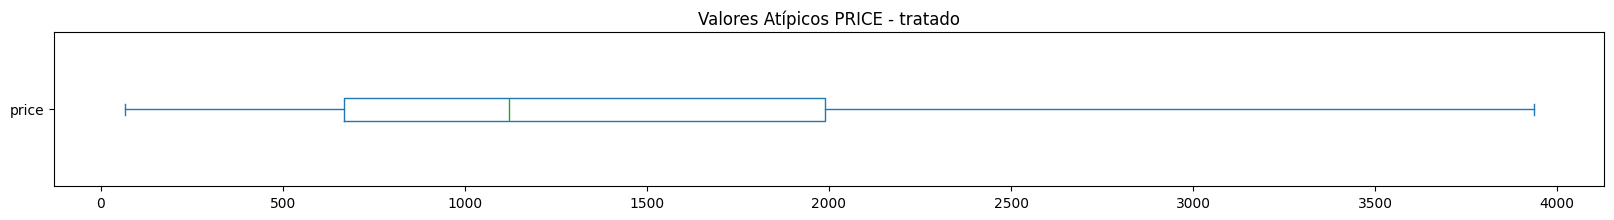

In [ ]:
#COLUMNA PRICE
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df['price']

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
data1= y[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data1.plot(kind='box', vert=False)
plt.title("Valores Atípicos PRICE - tratado")
plt.show()

Limite superior permitido 26.0
Limite inferior permitido -14.0


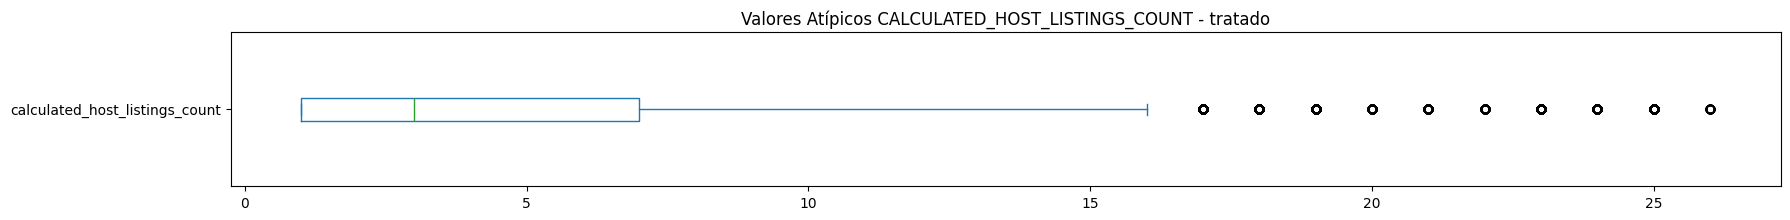

In [ ]:
#COLUMNA CALCULATED_HOST_LISTINGS_COUNT
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y2= df['calculated_host_listings_count']

percentile25=y2.quantile(0.25) #Q1
percentile75=y2.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
data2= y2[(y2<=Limite_Superior_iqr)&(y2>=Limite_Inferior_iqr)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data2.plot(kind='box', vert=False)
plt.title("Valores Atípicos CALCULATED_HOST_LISTINGS_COUNT - tratado")
plt.show()

Limite superior permitido 4.965
Limite inferior permitido -2.115


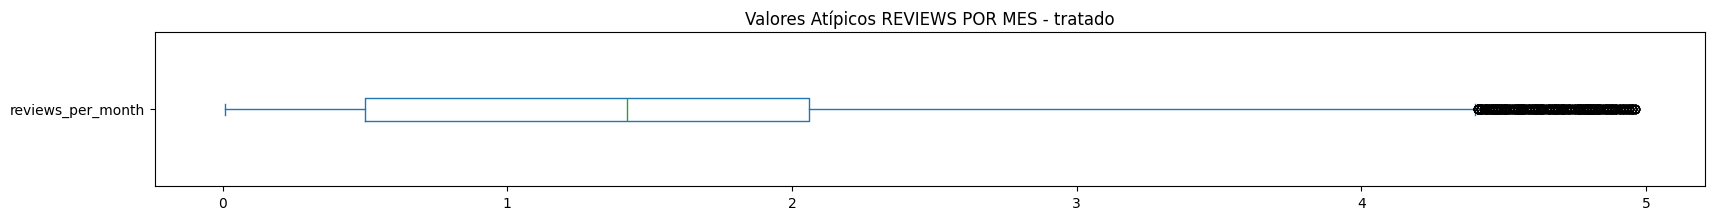

In [ ]:
#COLUMNA REVIEWS PER MONTH
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y3=df['reviews_per_month']

percentile25=y3.quantile(0.25) #Q1
percentile75=y3.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
data3= y3[(y3<=Limite_Superior_iqr)&(y3>=Limite_Inferior_iqr)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data3.plot(kind='box', vert=False)
plt.title("Valores Atípicos REVIEWS POR MES - tratado")
plt.show()

Limite superior permitido 3939.731180006053
Limite inferior permitido -1261.4387080036317


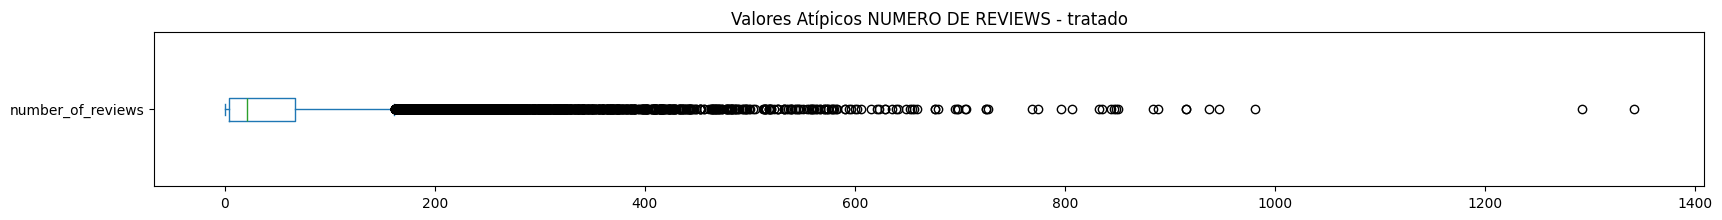

In [ ]:
#COLUMNA NUMBER OF REVIEWS
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y4= df['number_of_reviews']

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
data4= y4[(y4<=Limite_Superior_iqr)&(y4>=Limite_Inferior_iqr)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data4.plot(kind='box', vert=False)
plt.title("Valores Atípicos NUMERO DE REVIEWS - tratado")
plt.show()

Procesamiento de outliers por el método desviación estandar

Limite superior permitido 300.71754797983607
Limite inferior permitido -195.55289512577752


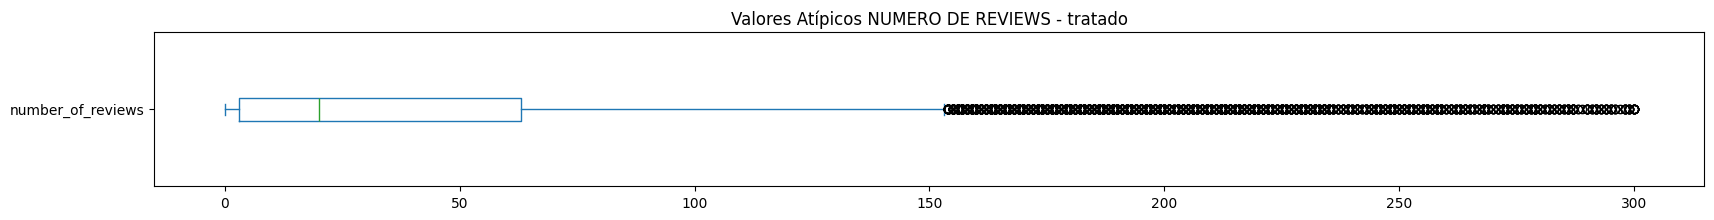

In [ ]:
#COLUMNA NUMBER OF REVIEWS
#Método aplicando desviación estandar. Encuentro los valores extremos
y5= df['number_of_reviews']

Limite_Superior= y5.mean() + 3*y5.std()
Limite_Inferior= y5.mean() - 3*y5.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data5= y5[(y5<=Limite_Superior)&(y5>=Limite_Inferior)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data5.plot(kind='box', vert=False)
plt.title("Valores Atípicos NUMERO DE REVIEWS - tratado")
plt.show()

Limite superior permitido 7.763050283751299
Limite inferior permitido -4.149447712967905


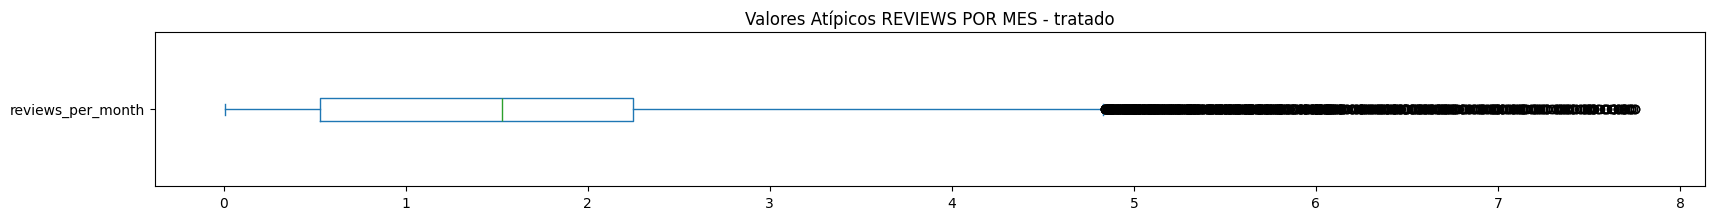

In [ ]:
#COLUMNA REVIEWS PER MONTH
#Método aplicando desviación estandar. Encuentro los valores extremos
y6= df['reviews_per_month']

Limite_Superior= y6.mean() + 3*y6.std()
Limite_Inferior= y6.mean() - 3*y6.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data6= y6[(y6<=Limite_Superior)&(y6>=Limite_Inferior)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data6.plot(kind='box', vert=False)
plt.title("Valores Atípicos REVIEWS POR MES - tratado")
plt.show()

Limite superior permitido 114.93836911298833
Limite inferior permitido -85.56455751494279


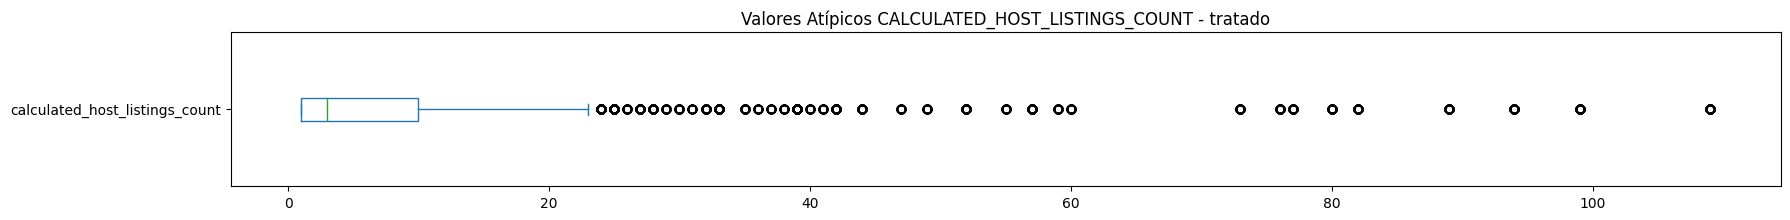

In [ ]:
#COLUMNA CALCULATED_HOST_LISTINGS_COUNT
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y7=  df['calculated_host_listings_count']

Limite_Superior= y7.mean() + 3*y7.std()
Limite_Inferior= y7.mean() - 3*y7.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data7= y7[(y7<=Limite_Superior)&(y7>=Limite_Inferior)]

#Gráficamos la columna price despues de haber eliminado los outliers
fig = plt.figure(figsize =(20, 2))
data7.plot(kind='box', vert=False)
plt.title("Valores Atípicos CALCULATED_HOST_LISTINGS_COUNT - tratado")
plt.show()

UNIÓN DE DATA FRAME 

In [ ]:
cuantitativos_limpios = df[['review_scores_communication', 'availability_365', 'review_scores_rating']]
data8 = pd.concat([cualitativas, cuantitativos_limpios], axis=1)
data8.head()

,room_type,host_acceptance_rate,host_response_rate,review_scores_communication,availability_365,review_scores_rating
0,Entire home/apt,Not specified,Not specified,4.823578,364,4.748716
1,Entire home/apt,91%,100%,4.780000,360,4.590000
2,Entire home/apt,100%,100%,4.940000,338,4.870000
3,Entire home/apt,47%,100%,4.920000,267,4.900000
4,Entire home/apt,85%,100%,4.980000,211,4.920000


In [ ]:
#Verificamos dimenciones de los dataframes
print('Dimensiones del dataframe original PRICE:', df['price'].shape)
print('Dimensiones del dataframe limpio price:', data1.shape)

print('Dimensiones del dataframe original CALCULATED_HOST_LISTINGS_COUNT:', df['calculated_host_listings_count'].shape)
print('Dimensiones del dataframe limpio:', data2.shape)

print('Dimensiones del dataframe original REVIEWS PER MONTH:', df['reviews_per_month'].shape)
print('Dimensiones del dataframe limpio:', data3.shape)

print('Dimensiones del dataframe original NUMBER OF REVIEWS:', df['number_of_reviews'].shape)
print('Dimensiones del dataframe limpio:', data5.shape)



Dimensiones del dataframe original PRICE: (26401,)
Dimensiones del dataframe limpio price: (25223,)
Dimensiones del dataframe original CALCULATED_HOST_LISTINGS_COUNT: (26401,)
Dimensiones del dataframe limpio: (23165,)
Dimensiones del dataframe original REVIEWS PER MONTH: (26401,)
Dimensiones del dataframe limpio: (25092,)
Dimensiones del dataframe original NUMBER OF REVIEWS: (26401,)
Dimensiones del dataframe limpio: (25807,)
